# Text Analysis and Sentiment

## What is sentiment analysis?
Broadly, it is extracting some kind of "sentiment" from text.

This sentiment could be positive vs negative, biased vs. objective, or even a topic.

While we will not spend too much time training ML algorithms, it is important to understand how they work:

## Use in Economics Research
- Many economics papers currently featurize text for analysis, but do not engage in ML algorithm training to predict sentiment.
    - ML algorithms do not allow interpretation of underlying parameters, and so are mostly useless for inference.
- The most cutting edge ones introduce their own measure of some "sentiment" in text (e.g. bias, positivity, dissent) and use it in their analysis.
- Another popular method is using text features or sentiment as covariates to explain another factor entirely.

See the article "Text as Data" for an exhaustive list of papers.

There are essentially three ways to do sentiment analysis:
1. Rule Based
2. Supervised Machine Learning
3. Unsupervised Machine Learning 


## 1. Rule Based
Most of the time there is no place to begin with assessing sentiment; there is no explicit "sentiment" variable. In this case the rule based approach is the most useful.

In this approach, individual words, phrases, and structures are __scored__ on some spectrum.

The rule for a string is then to score the tokens $X$ and summarize them to find $y$.

In this approach:
- You do not need labeled data...
- ... but you need all the possible words to be scored.

### How do these algorithms obtain word scorings?
From what I can tell, there are two parts to it:
1. Linguistic experts constructing sentiment scores and rules for calculating sentiment.
2. Random people on Amazon Mechanical Turk being asked to score word sentiment.

The advantage of this approach is that is informed by linguistic theory and not simply barfed out by a machine learning algorithm.

By incorporating linguistic theory, we can avoid the possibly weird mistakes an ML algorithm might make if it did not have enough data.

### Example: VADER
Valence Aware Dictionary and sEntiment Reasoner (VADER) is a rule-based sentiment analyzer. Using a detailed dictionary, it works by:
1. Assessing the "polarity" (positive or negative) of a word.
2. Assessing whether any word near that word "enhances" the polarity.

This is what makes it "aware" of "valence" (degree to which it is good or bad).

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

VADER can see the difference between these phrases:

In [2]:
vader.polarity_scores("good"),\
vader.polarity_scores("very good"),\
vader.polarity_scores("not good"),\
vader.polarity_scores("not bad")

({'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927},
 {'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.3412},
 {'neg': 0.0, 'neu': 0.26, 'pos': 0.74, 'compound': 0.431})

It understands how punctuation can enhance things:

In [3]:
vader.polarity_scores("bad"),\
vader.polarity_scores("bad!"),\
vader.polarity_scores("bad!!!")

({'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423},
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5848},
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6571})

It was made specifically for analyzing Tweets:

In [4]:
vader.polarity_scores("lol"),\
vader.polarity_scores("wtf"),\
vader.polarity_scores("smh"),\
vader.polarity_scores(":)"),\
vader.polarity_scores(":(")

({'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215},
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5859},
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3182},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588},
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404})

... but it doesn't understand emojis.

In [5]:
vader.polarity_scores("😍")

{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

__How could we get it to understand emojis?__

Two possible ways:
1. Rule based: have someone assign sentiment scores to each emoji.
2. Convert to words: replace emojis with words that describe them.

2 is made easier by the fact that all emojis have "unicode text" attached to them:

In [6]:
from emoji import demojize
demojize("😍")

':smiling_face_with_heart-eyes:'

In [7]:
# make this a set of words
print(demojize("😍").replace("_"," "))

# now run it through
vader.polarity_scores(demojize("😍").replace("_"," "))

:smiling face with heart-eyes:


{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}

### An aside: what are emojis?
You will run into this in your next homework assignment.

Emojis are technically blocks of "unicode," a representation used for glyphs and other unusual symbols for typsetting.

Each emoji has a unicode "code" and usually text describing it.

In [8]:
import emoji

In [9]:
demojize('😭')

':loudly_crying_face:'

In [10]:
emoji.emojize(":loudly_crying_face:")

'😭'

In [11]:
# This is the unicode
print('\U0001F62D')

😭


### When would you want to use the rule-based approach?
1. You need to infer sentiment and have no labeled data (like in the case of our book analysis).
2. Your case is generic enough that one of the rule algorithms will work well.

__Useful when you have no labeled examples of sentiment__.

## 2. Supervised Machine Learning
__Supervised__ algorithms are those that predict a target, usually called $y$, with "features," usually called $X$. 

### The Test-Training Paradigm
Supervised learning algorithms focus mostly on prediction instead of inference. They are trained to minimize a certain function for a certain variable $(y)$ given a set of "features" ($X$).

The recipe:
1. Split your data randomly into "training" and "test" set.
2. Find the set of parameters for your model that minimizes the function on the training set.
3. Use those parameters to "predict" $y$ with $X$ in the test set.
4. Compare the $y$ you predicted with the actual $y$.

#### Example: Linear Regression
For ordinary least squares regression, the function minimizes sum of squared error $\sum (y-\beta x)^2$ given a target $y$, a feature vector $X$, and a parameter vector $\beta$.

$$ y_{train} = \beta_{train} X_{train}$$

After splitting our data, we can minimize the function on the training set and estimate $\hat{\beta}_{train}$. Going to the test set, we then can predict: 

$$\hat{y}_{test} = \hat{\beta}_{train} X_{test}$$

Then we can compare $y_{test}$ to $\hat{y}_{test}$ to see how close we got.

#### Ok, now what?
If our prediction is not very good, for example the difference is really large, what can we do to improve fit?

### Hyperparameters

One thing we could do is add more variables. Suppose, for example, that we think $X$ is non-linear in $y$. What if we added a squared term?

$$ y = \beta_1 X + \beta_2 X^2$$

But why not just keep adding more polynomials? What power of polynomial helps us?

Call $P$ the order of polynomial that we have in our model. This would be an example of a __hyperparameter__.

To choose the parameter, we can plug in different $P$ to figure out which one gets the difference between $y_{test}$ and $\hat{y}_{test}$ the smallest.

But are the results sensitive to the particular set of the data we chose?

This is why we use __k-fold cross validation__.

### K-Fold Cross Validation

<center> <img width="800" src="kfolds.png"> </center>

[Graph from this guy's notebook](http://ethen8181.github.io/machine-learning/model_selection/model_selection.html)

   So in essence, we take the average "performance" across a number of splits of the data.
   
   We tend to pick the hyper parameter value that maximizes the average performance.

### Implementation

To use supervised machine learning to do sentiment analysis:

- $y$ is a discrete variable
    - Example: positive or negative.
    - Example: star rating.
    - Example: subjective rating.
- $X$ is made up of features of the text (word counts, n-grams, etc.)

The machine learning approach to sentiment analysis:
1. Find "labeled" text. For example, Amazon reviews with ratings.
2. Use the features of the text to predict ratings.
3. Train the algorithm with as much labeled text as possible.

Finally, feed it in text you want to understand the sentiment of.

#### Example: Naive Bayes
What is the probability that a certain text is positive or negative given features of the text $X$?

Otherwise stated, what is $P(Positive|X)$?

Bayes Theorem tells us:
$$ P(Positive|X) = \frac{P(X|Positive) P(Positive)}{P(X)}$$

So we could figure out this probability if we happen to have a model for $P(X|Positive)$. We care about the numerator because we can a make a metric to help us classify by dividing posterior probabilities:

$$ \frac{P(Positive|X)}{P(Not Positive|X)} = \frac{P(X|Positive) P(Positive)}{P(X|Not Positive) P(Not Positive)}$$

#### Why is it naive?
The numerator is equivalent to $P(X,Positive)$, the joint probability. This is more complex the bigger $X$ is. From the wikipedia entry:
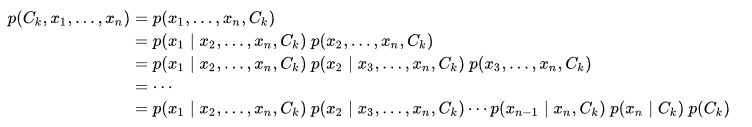




hard to estimate... __unless__ all components of $X$ are conditionally independent.

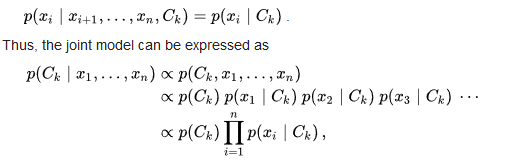

In our case:

$P(Positive|X) = P(Positive)\Pi^n_{i=1} P(x_i|Positive) $

__What does conditional independence imply for text?__


If X is a vector of word counts, it means that __saying one word cannot reduce the probability of saying another word__.

This is a "generative model" since we are attempting to specify how certain words are generated.

All we now have to do is specify a distribution from $P(X|Positive)$ and we can estimate the model.

For example, Gaussian Naive Bayes assumes the probabilities are distributed Gaussian.

For text analysis, people often use a variant called "Multinomial Naive Bayes" (MNB) which assumes that a given text has a multinomial distribution producing the words. This would mean __our word counts are drawn from a multinomial distribution.__

This allows using one word to lower the the probability of __all other words__ (but not a specific one).

### When would you want to use the supervised approach?
1. When you have labeled sentiment and you need to predict sentiment for unlabeled data.
2. Your sentiment is specific to your case: star ratings, percent ratings, etc. and you need to predict it.

__Useful when you need to predict something and have some labeled data already__.

### 3. Unsupervised Machine Learning
There is still a way to learn from text even if "sentiment" is not explicitly defined.

But first, __what do I mean by supervised and unsupervised?__

Supervised algorithms are trained to predict $y$ using $X$.

Unsupervised algorithms find latent features of the data using __only__ $X$.


#### Topic Analysis

One example of an unsupervised learning approach to text analysis is "topic analysis."

This analysis assumes there are $K$ underlying "topics" from which words are drawn from.

Mathematically, this is equivalent to a __factor model__ where observed word frequencies are predicting latent factors.

<center>
<img src=factor_model.png>
</center>
<center>
From "Text as Data," pg. 548 
    </center>

One algorithm to do this is __Latent Dirichlet Allocation__, so called because it is a generative model where the prior is Dirichlet distributed.

The algorithm works in the following steps.
1. Randomly allocate $K$ topics across your documents $M$, which have word counts $W$.
2. Calculate probabilities that indicate how often:

    a. A topic appears in a document, something like $p(k | m)$

    b. A word appears with a document, something like $p(w| k)$
    
3. Use these probabilities to update $p(k,w) = p(k | m)p(w| k)$

Do this until the topics don't move anymore.

End goal is something that looks like this:

$$ K_1 = .32  \text{fish} + .41  \text{cat}$$
$$ K_2 = .12  \text{beef} + .26  \text{dogs}$$

Which are "factor scores" calculated for the different words and how they associate with topics.

It is then up to the researcher to determine whether $K$ mean anything at all.

__What did this really do?__

It looked for correlations between observed word counts to estimate a probability vector of topics over words. It did this by randomly choosing topics, calculating conditional probabilities, and iterating until topics were stable.

Did we have to assume all that stuff about the underlying distributions?

__Sort of__.

An algorithm similar to this is __Principal Component Analysis__, which attempts to find underlying components of the data using eigenvectors of the covariance matrix of the features $X$.

PCA puts less structure on the problem but potentially tells you less.

Some key differences:

- Model
    1. LDA assumes probability distributions.
    2. PCA does not assume any probability distributions.
- Criteria
    1. LDA maximizes the shared variance between one latent topic.
    2. PCA maximizes the total variance with one component and then subsequent components.
    


- Variables
    1. LDA: Topics, Documents, Words.
    2. PCA: Word counts.
- Use
    1. LDA is used to test a formal model.
    2. PCA is used as a dimensionality reduction technique.

### When do we use the unsupervised approach?
- When you have no labled data, but still want to discover underlying patterns.
- Requires you to interpret what combinations of words mean instead of letting a rule based algorithm do it for you.
- Good for more complex sentiment for which rule based approaches don't exist.

__Use unsupervised approach when you need to find broader patterns in the data beyond simple sentiment.__

### An Example from "Python for Data Science"

Using a Naive Bayes classifier to predict group labels.

Use some data from online news articles

In [23]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [24]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'rec.sport.baseball','rec.sport.hockey',
              'sci.crypt', 'comp.graphics','talk.politics.guns','talk.politics.mideast']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

#       Function that sends input through to one function and then the output from 
#       that function to the next one.
model = make_pipeline(CountVectorizer(stop_words="english"), MultinomialNB())

What does the vectorizer do?

In [40]:
len(train['data'])

4462

In [41]:
tf_vec = CountVectorizer(stop_words="english")

X = tf_vec.fit_transform(train.data)

In [42]:
X

<4462x57579 sparse matrix of type '<class 'numpy.int64'>'
	with 563577 stored elements in Compressed Sparse Row format>

The feature names are stored here:

In [43]:
feature_names = tf_vec.get_feature_names_out()

Make a dataframe:

In [46]:
df =pd.DataFrame(X.toarray(), \
                 columns=feature_names)

df

,00,000,0000,00000000,00000000b,00000001,00000001b,00000010,00000010b,00000011,...,ºnd,çait,çon,ère,ée,égligent,élangea,érale,ête,ñaustin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Get the top 10 word counts:

In [47]:
df.sum().sort_values(ascending=False).head(10)

edu             8721
subject         4852
lines           4638
organization    4396
com             4332
people          3488
writes          3422
article         3085
don             2713
like            2524
dtype: int64

Here we will fit the model and predict on the test set.

In [48]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

How do we know it's correct? The confusion matrix is one metric:

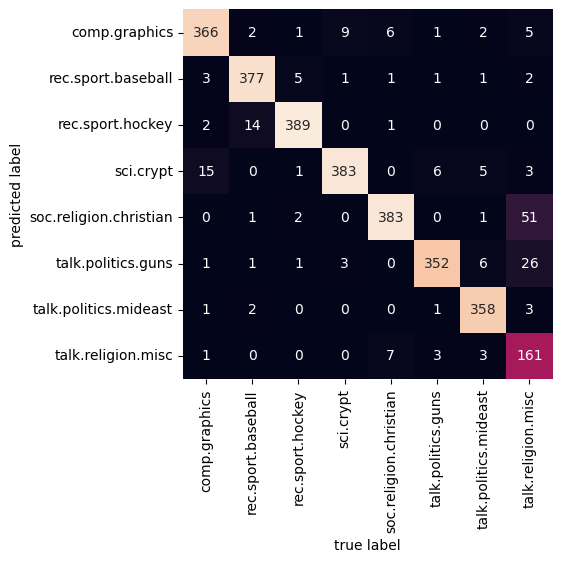

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Let's see how it predicts...

In [50]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [69]:
predict_category("maple leaf")

'rec.sport.hockey'

What would you do from here?
- Try picking different hyperparameters for the estimator, trying them out on different splits of the data.
    - The default parameter ($\alpha$) was set to 1 ("Laplace Smoothing").
    - Ideally you would choose this using cross-validation.
- Look at some kind of metric that tells you how accurate its being (your loss function).